In [1]:
import pandas as pd
import os
import numpy as np
import collections
from Bio.Seq import Seq 
from Bio import pairwise2
from scipy.spatial import distance
from tqdm import tqdm

/home/mark/anaconda3/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
centromeres = pd.read_csv("/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/FinalCentromereLists/originals_wHiFiASM/hgsvc3_verkko_v1.4_hifiasm_v0.19.6_nonredundant_complete_and_accurate_centromeric_regions_v3.list",sep='\t',header=None)
chr2centromeres = centromeres[centromeres[2]=='chr2'].copy()

In [3]:
centromeres

,0,1,2,3
0,HG00096,h1tg000020l#1-134864016:48261972-55426970,chr11,+
1,HG00096,h1tg000044l#1-4775385:2-3027825,chr2,-
2,HG00096,h2tg000024l#1-133471904:98433763-102787061,chr8,-
3,HG00096,haplotype1-0000003:88268410-92360558,chr14,-
4,HG00096,haplotype1-0000033:22965767-24288948,chrY,-
...,...,...,...,...
1241,NA24385,haplotype2-0000087:95533878-102110202,chr13,-
1242,NA24385,haplotype2-0000088:44541424-47913094,chr9,+
1243,NA24385,haplotype2-0000091:7816579-13583364,chr15,+
1244,NA24385,haplotype2-0000092:1429010-5964706,chr21,+


In [3]:
chr2centromeres['Start']=[int(x.split(":")[1].split("-")[0]) for x in chr2centromeres[1]]
chr2centromeres['End']=[int(x.split(":")[1].split("-")[1]) for x in chr2centromeres[1]]
chr2centromeres['Length']=[abs(int(chr2centromeres.at[x,'End'])-int(chr2centromeres.at[x,'Start'])) for x in chr2centromeres.index]

In [4]:
chr2centromeres

,0,1,2,3,Start,End,Length
1,HG00096,h1tg000044l#1-4775385:2-3027825,chr2,-,2,3027825,3027823
23,HG00171,haplotype1-0000028:39920908-42795822,chr2,-,39920908,42795822,2874914
45,HG00268,haplotype1-0000020:91347857-94301412,chr2,+,91347857,94301412,2953555
69,HG00358,haplotype1-0000022:2-3544202,chr2,+,2,3544202,3544200
82,HG00358,haplotype2-0000104:2-3191151,chr2,+,2,3191151,3191149
...,...,...,...,...,...,...,...
1189,NA20355,haplotype2-0000190:91550423-95408663,chr2,+,91550423,95408663,3858240
1198,NA20509,haplotype1-0000003:92400012-95247753,chr2,+,92400012,95247753,2847741
1206,NA20509,haplotype2-0000097:147107097-150370356,chr2,-,147107097,150370356,3263259
1227,NA24385,haplotype1-0000010:136023374-139364828,chr2,-,136023374,139364828,3341454


In [5]:
centDF = pd.read_csv("/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/dataframes/goodMEI_HORCentromere_HIFIasmAndVerkko_wExtendedSequences_09-05-2024.csv").set_index("ID")
chr2 = centDF[centDF['CHROM']=='chr2'].copy()

In [7]:
uniqueChromosomes = set([x.split(":")[0]+"_"+str(centDF.at[x,'Sample'])+"_"+str(centDF.at[x,'Haplotype'])+"_"+str(centDF.at[x,'CHROM']) for x in centDF.index])
len(uniqueChromosomes)

383

In [8]:
uniqueChromosomes

{'h1tg000001l#1-106782105_NA19036_hap1_chrX',
 'h1tg000001l#1-181309523_HG03807_hap1_chr3',
 'h1tg000001l#1-66438338_NA12329_hap1_chr20',
 'h1tg000002l#1-171627617_NA19983_hap1_chr6',
 'h1tg000002l#1-242710469_NA19347_hap1_chr2',
 'h1tg000003l#1-36159409_HG01457_hap1_chr5',
 'h1tg000004l#1-133521983_HG03732_hap1_chr12',
 'h1tg000004l#1-155136524_HG00358_hap1_chrX',
 'h1tg000004l#1-96190063_NA12329_hap1_chr14',
 'h1tg000005l#1-133762260_HG03456_hap1_chr12',
 'h1tg000005l#1-67722937_HG02666_hap1_chr20',
 'h1tg000006l#1-160313678_NA20355_hap1_chr7',
 'h1tg000006l#1-242379780_HG03248_hap1_chr2',
 'h1tg000007l#1-27719469_HG04217_hap1_chr16',
 'h1tg000007l#1-94789535_HG03456_hap1_chr14',
 'h1tg000008l#1-67048547_HG02011_hap1_chr15',
 'h1tg000009l#1-147105400_NA19347_hap1_chr8',
 'h1tg000009l#1-242734737_HG01890_hap1_chr2',
 'h1tg000009l#1-48620960_HG01457_hap1_chr16',
 'h1tg000010l#1-192627187_NA19240_hap1_chr4',
 'h1tg000010l#1-67740167_HG00731_hap1_chr6',
 'h1tg000010l#1-90308419_NA19347_h

In [9]:
383/1246

0.3073836276083467

In [10]:
cdrDF = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/FinalCentromereLists/chromosomes/hgsvc3_verkko_v1.4_hifiasm_v0.19.6_CDRs_chr2_v2_forMark.txt', sep='\t', header=None)
sampleCDRRegions = {sample:{'unassignedContig':'TEMP','unassigned':[],'haplotype1ContigHifi':'TEMP','haplotype1Hifi':[],'haplotype1Contig':'TEMP','haplotype1':[], 'haplotype2':[],'haplotype2Contig':'TEMP','haplotype2Hifi':[],'haplotype2ContigHifi':'TEMP'} for sample in set(cdrDF[0])}

for sample in set(cdrDF[0]):
    #print(sample)
    tempDF = cdrDF[cdrDF[0]==sample].copy()
    for row in tempDF.index:
        if 'h1tg' in tempDF.at[row,1]:
            sampleCDRRegions[sample]["haplotype1ContigHifi"]=str(tempDF.at[row,1])
            sampleCDRRegions[sample]["haplotype1Hifi"].append(str(tempDF.at[row,2])+"-"+str(tempDF.at[row,3]))
        elif 'h2tg' in tempDF.at[row,1]:
            sampleCDRRegions[sample]["haplotype2ContigHifi"]=str(tempDF.at[row,1])
            sampleCDRRegions[sample]["haplotype2Hifi"].append(str(tempDF.at[row,2])+"-"+str(tempDF.at[row,3]))
        else:
            sampleCDRRegions[sample][tempDF.at[row,1].split("-")[0]+"Contig"]=str(tempDF.at[row,1])
            sampleCDRRegions[sample][tempDF.at[row,1].split("-")[0]].append(str(tempDF.at[row,2])+"-"+str(tempDF.at[row,3]))

In [11]:
cdrDF

,0,1,2,3,4,5,6,7,8
0,HG00171,haplotype1-0000028,41279274,41397774,chr2,-,NaN,NaN,NaN
1,HG00171,haplotype1-0000028,41434436,41464800,chr2,-,NaN,NaN,NaN
2,HG00268,haplotype1-0000020,91908760,91925628,chr2,+,NaN,NaN,NaN
3,HG00268,haplotype1-0000020,92011510,92039113,chr2,+,NaN,NaN,NaN
4,HG00268,haplotype1-0000020,92051313,92075814,chr2,+,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
315,NA19347,h2tg000055l#1-64051424,18398437,18436041,chr2,-,NaN,NaN,NaN
316,NA19347,h2tg000055l#1-64051424,18438880,18450231,chr2,-,NaN,NaN,NaN
317,NA19347,h2tg000055l#1-64051424,18472769,18510775,chr2,-,NaN,NaN,NaN
318,NA19983,h1tg000061l#1-5901540,4615338,4732383,chr2,+,NaN,NaN,NaN


In [12]:
cdrDF[cdrDF[0]=='NA24385']

,0,1,2,3,4,5,6,7,8
147,NA24385,haplotype2-0000096,92773514,92794729,chr2,+,NaN,NaN,NaN
148,NA24385,haplotype2-0000096,92799810,92823416,chr2,+,NaN,NaN,NaN
149,NA24385,haplotype2-0000096,92832609,92835711,chr2,+,NaN,NaN,NaN
150,NA24385,haplotype2-0000096,92837646,92860171,chr2,+,NaN,NaN,NaN
151,NA24385,haplotype2-0000096,92870331,92890351,chr2,+,NaN,NaN,NaN
152,NA24385,haplotype2-0000096,92993445,93023326,chr2,+,NaN,NaN,NaN
153,NA24385,haplotype1-0000010,137492339,137513660,chr2,-,NaN,NaN,NaN
154,NA24385,haplotype1-0000010,137520559,137562887,chr2,-,NaN,NaN,NaN
155,NA24385,haplotype1-0000010,137563201,137571980,chr2,-,NaN,NaN,NaN
156,NA24385,haplotype1-0000010,137588912,137602080,chr2,-,NaN,NaN,NaN


In [13]:
sampleCDRRegions['HG01457']

{'unassignedContig': 'TEMP',
 'unassigned': [],
 'haplotype1ContigHifi': 'h1tg000028l#1-77458027',
 'haplotype1Hifi': ['76039014-76051141',
  '76084558-76087038',
  '76108273-76116119',
  '76220490-76233150',
  '76267841-76270985',
  '76287966-76303310',
  '76307965-76337773',
  '76342805-76358527'],
 'haplotype1Contig': 'TEMP',
 'haplotype1': [],
 'haplotype2': [],
 'haplotype2Contig': 'TEMP',
 'haplotype2Hifi': ['77692688-77704244',
  '77710351-77741968',
  '77760722-77803897',
  '77812620-77823740'],
 'haplotype2ContigHifi': 'h2tg000021l#1-78522348'}

In [14]:
from tqdm import tqdm 
for sample in tqdm(sampleCDRRegions.keys()):
    #print(sample)
    flag=0
    
    for haplotype in ['haplotype1','haplotype2','unassigned']:
        
        boundaries=[]
        for coordinate in sampleCDRRegions[sample][haplotype]:
            if len(boundaries)==0:
                boundaries.append(coordinate)
            else:
                for previousCoordinate in boundaries:
                    x = range(int(coordinate.split("-")[0]),int(coordinate.split("-")[1]))
                    y = range(int(previousCoordinate.split("-")[0]),int(previousCoordinate.split("-")[1]))
                    xs = set(x)
                    length = len(xs.intersection(y))
                    
                    
                    if length>0:
                        flag+=1
                    else:
                        continue
            
            boundaries.append(coordinate)

    if flag==0:
        continue
    else:
        print(sample)

100%|██████████████████████████████████████████| 51/51 [00:00<00:00, 109.82it/s]


In [23]:
from Bio.Seq import Seq

#for element in set(chr2['TE_Designation']):
    tempDF = chr2[chr2['TE_Designation']==element].copy()
    #with open("/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/"+str(element.replace("/","_"))+".fasta", 'a+') as file:
        for row in tempDF.index:
            if tempDF.at[row,'Orientation'] =='+':
                file.write(">"+str(row)+"_"+str(tempDF.at[row,'Sample'])+"_"+str(tempDF.at[row,'Haplotype'])+"\n")
                file.write(str(tempDF.at[row,'Extended_Sequence'])+"\n")
                
            else:
                sequence = Seq(str(tempDF.at[row,'Extended_Sequence']))
                file.write(">"+str(row)+"_"+str(tempDF.at[row,'Sample'])+"_"+str(tempDF.at[row,'Haplotype'])+"\n")
                file.write(str(sequence.reverse_complement())+"\n")
    file.close()

In [24]:
from Bio.Seq import Seq

#for element in set(centDF['TE_Designation']):
    
    tempDF = centDF[centDF['TE_Designation']==element].reset_index().copy()
    tempDF['UniqueName']= [x+"_"+y+"_"+z for x,y,z in zip(tempDF['ID'], tempDF['Sample'], tempDF['CHROM'])]
    #break
    elementSimplified = str(element).replace("/",'_')
    
    #with open("/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/AllHORs/"+str(elementSimplified)+".fasta", 'a+') as file:
        for row in tempDF.index:
            if tempDF.at[row,'Orientation'] =='+':
                file.write(">"+str(tempDF.at[row,'UniqueName'])+"\n")
                file.write(str(tempDF.at[row,'Extended_Sequence'])+"\n")
                
            else:
                sequence = Seq(str(tempDF.at[row,'Extended_Sequence']))
                file.write(">"+str(tempDF.at[row,'UniqueName'])+"\n")
                file.write(str(sequence.reverse_complement())+"\n")
    file.close()

## Read in the Unique Elements

In [15]:
from Bio import SeqIO

alu_v1_list = []
fasta_sequences = SeqIO.parse(open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/SINE_Alu_v1.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    alu_v1_list.append(name.split("_")[0])
    
alu_v2_list = []
fasta_sequences = SeqIO.parse(open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/SINE_Alu_v2.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    alu_v2_list.append(name.split("_")[0])
    
alu_v3_list = []
fasta_sequences = SeqIO.parse(open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/SINE_Alu_v3.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    alu_v3_list.append(name.split("_")[0])
    
L1_v1_list = []
fasta_sequences = SeqIO.parse(open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/LINE_L1_v1.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    L1_v1_list.append(name.split("_")[0])
    
L1_v2_list = []
fasta_sequences = SeqIO.parse(open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/LINE_L1_v2.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    L1_v2_list.append(name.split("_")[0])
    
L1_v3_list = []
fasta_sequences = SeqIO.parse(open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/Chr2_Sequences/LINE_L1_v3.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    L1_v3_list.append(name.split("_")[0])

In [16]:
print(len(alu_v1_list))
print(len(alu_v2_list))
print(len(alu_v3_list))

print(len(L1_v1_list))
print(len(L1_v2_list))
print(len(L1_v3_list))

3
1
2
1
1
161


In [17]:
print(chr2.at[alu_v1_list[0],'Element_Annotation']) light blue
print(chr2.at[alu_v2_list[0],'Element_Annotation']) purple
print(chr2.at[alu_v3_list[0],'Element_Annotation']) dark blue
print('\n')
print(chr2.at[L1_v1_list[0],'Element_Annotation']) lime green
print(chr2.at[L1_v2_list[0],'Element_Annotation']) orange
print(chr2.at[L1_v3_list[0],'Element_Annotation']) red

SyntaxError: invalid syntax (27044248.py, line 1)

In [18]:
#Figure out the length of the HOR arrays
centroHORDF = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/FinalCentromereLists/originals_wHiFiASM/hgsvc3_verkko_v1.4_hifiasm_v0.19.6_nonredundant_complete_and_accurate_active_asat_HOR_arrays_v3.list',sep='\t', header=None)
centroHORDF['Length']=[abs( int(x.split(":")[1].split("-")[1]) -int(x.split(":")[1].split("-")[0])) for x in centroHORDF[1]]
centroHORDF['Start']= [int(x.split(":")[1].split("-")[0]) for x in centroHORDF[1]]
centroHORDF['End']= [int(x.split(":")[1].split("-")[1]) for x in centroHORDF[1]]
centroHORDF['Haplotype']= [x.split(":")[0]+"_"+str(y) for x,y in zip(centroHORDF[1], centroHORDF[0])]
centroHORDF

,0,1,2,3,Length,Start,End,Haplotype
0,HG00096,h1tg000020l#1-134864016:50981805-54105816,chr11,+,3124011,50981805,54105816,h1tg000020l#1-134864016_HG00096
1,HG00096,h1tg000044l#1-4775385:271483-2484715,chr2,-,2213232,271483,2484715,h1tg000044l#1-4775385_HG00096
2,HG00096,h2tg000024l#1-133471904:99525684-101864402,chr8,-,2338718,99525684,101864402,h2tg000024l#1-133471904_HG00096
3,HG00096,haplotype1-0000003:88831344-90524600,chr14,-,1693256,88831344,90524600,haplotype1-0000003_HG00096
4,HG00096,haplotype1-0000033:23295101-23618710,chrY,-,323609,23295101,23618710,haplotype1-0000033_HG00096
...,...,...,...,...,...,...,...,...
1378,NA24385,haplotype2-0000087:96096375-97397180,chr13,-,1300805,96096375,97397180,haplotype2-0000087_NA24385
1379,NA24385,haplotype2-0000088:45060964-47417193,chr9,+,2356229,45060964,47417193,haplotype2-0000088_NA24385
1380,NA24385,haplotype2-0000091:11788435-13027486,chr15,+,1239051,11788435,13027486,haplotype2-0000091_NA24385
1381,NA24385,haplotype2-0000092:4714744-5420884,chr21,+,706140,4714744,5420884,haplotype2-0000092_NA24385


In [19]:
chr2['Color']='grey'
for row in chr2.index:
    if row.strip() in alu_v1_list:
        chr2.at[row,'Color']='#00d5ff'
        
    elif row.strip() in alu_v2_list:
        chr2.at[row,'Color']='#bc0af7'
    
    elif row.strip() in alu_v3_list:
        chr2.at[row,'Color']='#1a0af7'
        
    elif row.strip() in L1_v1_list:
        chr2.at[row,'Color']='#8cff00'
        
    elif row.strip() in L1_v2_list:
        chr2.at[row,'Color']='#ffb300'
    
    elif row.strip() in L1_v3_list:
        chr2.at[row,'Color']='#E4003A'
    
    else:
        print(row)
        print("??")
chromtwoDF=chr2.copy()
chromtwoDF['Contig_Haplotype']=[x.split(":")[0]+"_"+str(y) for x,y in zip(chromtwoDF.index, chromtwoDF['Sample'])]

In [23]:
import collections
colorDict={x:[] for x in set(chromtwoDF['Color'])}
for haplotype in set(chromtwoDF['Contig_Haplotype']):
    tempDF = chromtwoDF[chromtwoDF['Contig_Haplotype']==haplotype].copy()
    tempDict = collections.Counter(tempDF['Color'])
    for key,value in tempDict.items():
        colorDict[key].append(value)

In [25]:
for key in colorDict.keys():
    print(key, np.mean(colorDict[key]))

#E4003A 2.875
#bc0af7 1.0
#8cff00 1.0
#00d5ff 1.0
#1a0af7 1.0
#ffb300 1.0


In [19]:
sampleCDRRegions

{'NA19650': {'unassignedContig': 'TEMP',
  'unassigned': [],
  'haplotype1ContigHifi': 'TEMP',
  'haplotype1Hifi': [],
  'haplotype1Contig': 'haplotype1-0000029',
  'haplotype1': ['5039980-5206226', '5391881-5420611'],
  'haplotype2': [],
  'haplotype2Contig': 'TEMP',
  'haplotype2Hifi': [],
  'haplotype2ContigHifi': 'TEMP'},
 'NA19384': {'unassignedContig': 'TEMP',
  'unassigned': [],
  'haplotype1ContigHifi': 'TEMP',
  'haplotype1Hifi': [],
  'haplotype1Contig': 'haplotype1-0000019',
  'haplotype1': ['148274743-148444785'],
  'haplotype2': ['93391037-93449072',
   '93453603-93496122',
   '93533641-93557402',
   '93572410-93617430',
   '93632439-93674958'],
  'haplotype2Contig': 'haplotype2-0000111',
  'haplotype2Hifi': [],
  'haplotype2ContigHifi': 'TEMP'},
 'HG03456': {'unassignedContig': 'TEMP',
  'unassigned': [],
  'haplotype1ContigHifi': 'TEMP',
  'haplotype1Hifi': [],
  'haplotype1Contig': 'TEMP',
  'haplotype1': [],
  'haplotype2': ['148769070-148779777',
   '148780968-1487901

In [20]:
chr2centromeres['Contig_Haplotype']=[x.split(":")[0]+"_"+str(y) for x,y in zip(chr2centromeres[1], chr2centromeres[0])]

In [21]:
chr2centromeres

,0,1,2,3,Start,End,Length,Contig_Haplotype
1,HG00096,h1tg000044l#1-4775385:2-3027825,chr2,-,2,3027825,3027823,h1tg000044l#1-4775385_HG00096
23,HG00171,haplotype1-0000028:39920908-42795822,chr2,-,39920908,42795822,2874914,haplotype1-0000028_HG00171
45,HG00268,haplotype1-0000020:91347857-94301412,chr2,+,91347857,94301412,2953555,haplotype1-0000020_HG00268
69,HG00358,haplotype1-0000022:2-3544202,chr2,+,2,3544202,3544200,haplotype1-0000022_HG00358
82,HG00358,haplotype2-0000104:2-3191151,chr2,+,2,3191151,3191149,haplotype2-0000104_HG00358
...,...,...,...,...,...,...,...,...
1189,NA20355,haplotype2-0000190:91550423-95408663,chr2,+,91550423,95408663,3858240,haplotype2-0000190_NA20355
1198,NA20509,haplotype1-0000003:92400012-95247753,chr2,+,92400012,95247753,2847741,haplotype1-0000003_NA20509
1206,NA20509,haplotype2-0000097:147107097-150370356,chr2,-,147107097,150370356,3263259,haplotype2-0000097_NA20509
1227,NA24385,haplotype1-0000010:136023374-139364828,chr2,-,136023374,139364828,3341454,haplotype1-0000010_NA24385


In [20]:
#centroHORDF.set_index("Haplotype", inplace=True)

In [21]:
chromtwoDF

,Sample,Haplotype,CHROM,Sequence,TE_Hits,Sequence_Length,Element_Annotation,Element_Divergence,TE_Proportion,TE_Percentage,...,Tail_Begins,Tail_Type,Tail_Length,Tail_Seed_Hits,Unique_Element_Count,Twin_Priming_Flag,HOR,Extended_Sequence,Color,Contig_Haplotype
ID,,,,,,,,,,,,,,,,,,,,,
h1tg000044l#1-4775385:473232-473895,HG00096,hap1,chr2,TCTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAG...,['20 15.4 0.0 0.0 h1tg000044l#1-4775385:473232...,724,L1HS,1.2,"{'ALR/Alpha': 0.05386740331491713, 'L1HS': 0.9...",0.957182,...,29,Possible_A-Tail,13,15,One_Element,NONE,YES,AAGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTC...,#E4003A,h1tg000044l#1-4775385_HG00096
h1tg000044l#1-4775385:665856-666519,HG00096,hap1,chr2,TCTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAG...,['20 15.4 0.0 0.0 h1tg000044l#1-4775385:665856...,724,L1HS,1.2,"{'ALR/Alpha': 0.05386740331491713, 'L1HS': 0.9...",0.957182,...,30,Possible_A-Tail,12,14,One_Element,NONE,YES,AAGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTC...,#E4003A,h1tg000044l#1-4775385_HG00096
h1tg000044l#1-4775385:692795-693458,HG00096,hap1,chr2,TCTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAG...,['20 15.4 0.0 0.0 h1tg000044l#1-4775385:692795...,724,L1HS,1.4,"{'ALR/Alpha': 0.05386740331491713, 'L1HS': 0.9...",0.957182,...,30,Possible_A-Tail,12,14,One_Element,NONE,YES,AAGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTC...,#E4003A,h1tg000044l#1-4775385_HG00096
h1tg000102l#1-1481846:510259-510922,HG00512,hap1,chr2,TCTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAG...,['20 15.4 0.0 0.0 h1tg000102l#1-1481846:510259...,724,L1HS,1.2,"{'ALR/Alpha': 0.05386740331491713, 'L1HS': 0.9...",0.957182,...,30,Possible_A-Tail,12,14,One_Element,NONE,YES,AAGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTC...,#E4003A,h1tg000102l#1-1481846_HG00512
h1tg000104l#1-3715949:675233-675896,HG00513,hap1,chr2,TCTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAG...,['20 15.4 0.0 0.0 h1tg000104l#1-3715949:675233...,724,L1HS,1.1,"{'ALR/Alpha': 0.05386740331491713, 'L1HS': 0.9...",0.957182,...,29,Possible_A-Tail,13,15,One_Element,NONE,YES,AAGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTC...,#E4003A,h1tg000104l#1-3715949_HG00513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
haplotype1-0000003:94161868-94162531,NA20509,hap1,chr2,TATGTGAAGAAAGACATTCACTACAGCATTTTTTTTTTTTTATTAT...,['851 1.2 0.0 0.0 haplotype1-0000003:94161868-...,724,L1HS,1.2,"{'L1HS': 0.9171270718232044, 'ALR/Alpha': 0.05...",0.958564,...,28,Possible_T-Tail,13,15,One_Element,NONE,YES,TTTTTTTTTTTTTAAATTAAAAATATGCGCACCACATACAGCTATA...,#E4003A,haplotype1-0000003_NA20509
haplotype2-0000097:148181563-148182226,NA20509,hap2,chr2,CTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAGG...,['20 15.4 0.0 0.0 haplotype2-0000097:148181563...,724,L1HS,1.2,"{'ALR/Alpha': 0.05386740331491713, 'L1HS': 0.9...",0.957182,...,30,Possible_A-Tail,13,15,One_Element,NONE,YES,AGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTCC...,#E4003A,haplotype2-0000097_NA20509
haplotype2-0000097:148345289-148345951,NA20509,hap2,chr2,CTCCAAATGTCCACTTCCAGATACTACAAAAAAGGTGCTGGAGAGG...,['20 15.4 0.0 0.0 haplotype2-0000097:148345289...,723,L1HS,1.2,"{'ALR/Alpha': 0.05394190871369295, 'L1HS': 0.9...",0.957123,...,31,Possible_A-Tail,11,13,One_Element,NONE,YES,AGTTTCTGACATTGCTTCTATCTAGCTTTTATTGGAAGATATTTCC...,#E4003A,haplotype2-0000097_NA20509


In [22]:
centroHORDF

,0,1,2,3,Length,Start,End,Haplotype
0,HG00096,h1tg000020l#1-134864016:50981805-54105816,chr11,+,3124011,50981805,54105816,h1tg000020l#1-134864016_HG00096
1,HG00096,h1tg000044l#1-4775385:271483-2484715,chr2,-,2213232,271483,2484715,h1tg000044l#1-4775385_HG00096
2,HG00096,h2tg000024l#1-133471904:99525684-101864402,chr8,-,2338718,99525684,101864402,h2tg000024l#1-133471904_HG00096
3,HG00096,haplotype1-0000003:88831344-90524600,chr14,-,1693256,88831344,90524600,haplotype1-0000003_HG00096
4,HG00096,haplotype1-0000033:23295101-23618710,chrY,-,323609,23295101,23618710,haplotype1-0000033_HG00096
...,...,...,...,...,...,...,...,...
1378,NA24385,haplotype2-0000087:96096375-97397180,chr13,-,1300805,96096375,97397180,haplotype2-0000087_NA24385
1379,NA24385,haplotype2-0000088:45060964-47417193,chr9,+,2356229,45060964,47417193,haplotype2-0000088_NA24385
1380,NA24385,haplotype2-0000091:11788435-13027486,chr15,+,1239051,11788435,13027486,haplotype2-0000091_NA24385
1381,NA24385,haplotype2-0000092:4714744-5420884,chr21,+,706140,4714744,5420884,haplotype2-0000092_NA24385


In [22]:
allHits=[]
chromosome='chr2'
for sampleContig in set(chr2centromeres['Contig_Haplotype']):
    
    #Length of the HOR Array (NOT CDR)
    chromosomeLengthDF = centroHORDF[(centroHORDF['Haplotype']==sampleContig) & (centroHORDF[2]==chromosome)].copy()
    arrayLength = int([x for x in chromosomeLengthDF['Length']][0])
    sample = str(sampleContig.split("_")[1])
    start = int([x for x in chromosomeLengthDF['Start']][0])
    end =int([x for x in chromosomeLengthDF['End']][0])
    Length =int([x for x in chromosomeLengthDF['Length']][0])
    
    #MEI Dataframe
    tempDF = chromtwoDF[chromtwoDF['Contig_Haplotype']==sampleContig].copy()
    
    #If you found mobile elements for the sample haplotype
    if len(tempDF)>0:
        
        #First lets deal with the CDRS
        if 'h1tg' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype1ContigHifi'
            cdrDict = sampleCDRRegions[sample]['haplotype1Hifi']
            additionalDesignatior='hifiasm'
            currentHap='hap1'
            
        elif 'h2tg' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype2ContigHifi'
            cdrDict = sampleCDRRegions[sample]['haplotype2Hifi']
            additionalDesignatior='hifiasm'
            currentHap='hap2'
            
        elif 'haplotype1' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype1Contig'
            cdrDict = sampleCDRRegions[sample]['haplotype1']
            additionalDesignatior='verkko'
            currentHap='hap1'
            
        elif 'haplotype2' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype2Contig'
            cdrDict = sampleCDRRegions[sample]['haplotype2']
            additionalDesignatior='verkko'
            currentHap='hap2'
        
        else:
            longCurrentHap = 'unassignedContig'
            cdrDict = sampleCDRRegions[sample]['unassigned']
            additionalDesignatior='verkko'
            currentHap='unassigned'
            
        for cdr in cdrDict:
            haplotypeContigName = sampleCDRRegions[sample][longCurrentHap]
            allHits.append([sample+"_"+str(currentHap)+"."+str(additionalDesignatior), int(cdr.split("-")[0])-int(start),int(cdr.split("-")[1])-int(start), 1, 'CDR', 'darkgrey', int(Length), sampleContig])

            
            
        #Now lets deal with the elements
        tempDF2 = tempDF.copy()
        for row in tempDF2.index:
            contig = str(row.split(":")[0])
            start2 =int(row.split(":")[1].split("-")[0])
            end2 =int(row.split(":")[1].split("-")[1])
            color = tempDF2.at[row,'Color']
            element = tempDF2.at[row,'Element_Annotation']
            
            allHits.append([sample+"_"+str(tempDF.at[row,'Haplotype']+"."+str(additionalDesignatior)), start2-int(start),end2-int(start), 1, element, color, int(Length), sampleContig])
        
        
    else:
        print(sample,sampleContig)
    
        #First lets deal with the CDRS
        if 'h1tg' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype1ContigHifi'
            cdrDict = sampleCDRRegions[sample]['haplotype1Hifi']
            additionalDesignatior='hifiasm'
            currentHap='hap1'
            
        elif 'h2tg' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype2ContigHifi'
            cdrDict = sampleCDRRegions[sample]['haplotype2Hifi']
            additionalDesignatior='hifiasm'
            currentHap='hap2'
            
        elif 'haplotype1' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype1Contig'
            cdrDict = sampleCDRRegions[sample]['haplotype1']
            additionalDesignatior='verkko'
            currentHap='hap1'
            
        elif 'haplotype2' in str(sampleContig.split("_")[0]):
            longCurrentHap = 'haplotype2Contig'
            cdrDict = sampleCDRRegions[sample]['haplotype2']
            additionalDesignatior='verkko'
            currentHap='hap2'
        
        else:
            longCurrentHap = 'unassignedContig'
            cdrDict = sampleCDRRegions[sample]['unassigned']
            additionalDesignatior='verkko'
            currentHap='unassigned'
            
        for cdr in cdrDict:
            haplotypeContigName = sampleCDRRegions[sample][longCurrentHap]
            allHits.append([sample+"_"+str(currentHap)+"."+str(additionalDesignatior), int(cdr.split("-")[0])-int(start),int(cdr.split("-")[1])-int(start), 1, 'CDR', 'darkgrey', int(Length), sampleContig])


NA19129 haplotype1-0000035_NA19129
NA19384 haplotype1-0000019_NA19384
NA19983 haplotype2-0000110_NA19983
HG02666 haplotype1-0000023_HG02666
HG02011 haplotype1-0000015_HG02011
HG03371 h2tg000002l#1-152316002_HG03371
HG02587 h1tg000053l#1-5136686_HG02587
NA24385 haplotype2-0000096_NA24385
HG01573 haplotype1-0000020_HG01573
HG03371 haplotype1-0000005_HG03371
HG03452 haplotype2-0000105_HG03452
HG00731 h2tg000020l#1-97493302_HG00731
NA19983 h1tg000061l#1-5901540_NA19983
NA20355 haplotype2-0000190_NA20355


In [23]:
allHitsDF = pd.DataFrame(data=allHits, columns=['Sample','Start','End','Count','Element','Color','ChromLength','Contig'])

In [24]:
allHitsDF.sort_values(by=['Sample','Start'])

,Sample,Start,End,Count,Element,Color,ChromLength,Contig
346,HG00096_hap1.hifiasm,201749,202412,1,L1HS,#E4003A,2213232,h1tg000044l#1-4775385_HG00096
347,HG00096_hap1.hifiasm,394373,395036,1,L1HS,#E4003A,2213232,h1tg000044l#1-4775385_HG00096
348,HG00096_hap1.hifiasm,421312,421975,1,L1HS,#E4003A,2213232,h1tg000044l#1-4775385_HG00096
340,HG00096_hap1.hifiasm,509760,539692,1,CDR,darkgrey,2213232,h1tg000044l#1-4775385_HG00096
341,HG00096_hap1.hifiasm,544497,570364,1,CDR,darkgrey,2213232,h1tg000044l#1-4775385_HG00096
...,...,...,...,...,...,...,...,...
288,NA24385_hap2.verkko,645361,668967,1,CDR,darkgrey,1952676,haplotype2-0000096_NA24385
289,NA24385_hap2.verkko,678160,681262,1,CDR,darkgrey,1952676,haplotype2-0000096_NA24385
290,NA24385_hap2.verkko,683197,705722,1,CDR,darkgrey,1952676,haplotype2-0000096_NA24385
291,NA24385_hap2.verkko,715882,735902,1,CDR,darkgrey,1952676,haplotype2-0000096_NA24385


In [254]:
#allHits=[]
#for sample in set(chromtwoDF['Sample']):
    
    #All the HOR Arrays linked to this sample name
#    chromosome='chr2'
#    chromosomeLengthDF = centroHORDF[(centroHORDF[0]==sample) & (centroHORDF[2]==chromosome)].set_index('Haplotype')
    
    #All the MEIS linked to the sample name
#    tempDF = chromtwoDF[chromtwoDF['Sample']==sample].copy()
    
#    for haplotype in set(tempDF['Contig_Haplotype']):
#        hifiFlag=0
#        unassignedFlag=0
#        tempHapDF = tempDF[tempDF['Contig_Haplotype']==haplotype].copy()
        
#        if 'h1tg' in str(haplotype):
#            longCurrentHap = 'haplotype1ContigHifi'
#            cdrDict = sampleCDRRegions[sample]['haplotype1Hifi']
#            additionalDesignatior='hifiasm'
#            currentHap='hap1'
            
#        elif 'h2tg' in str(haplotype):
#            longCurrentHap = 'haplotype2ContigHifi'
#            cdrDict = sampleCDRRegions[sample]['haplotype2Hifi']
#            additionalDesignatior='hifiasm'
#            currentHap='hap2'
#            
#        elif 'haplotype1' in str(haplotype):
#            longCurrentHap = 'haplotype1Contig'
#            cdrDict = sampleCDRRegions[sample]['haplotype1']
#            additionalDesignatior='verkko'
#            currentHap='hap1'
#            
#        elif 'haplotype2' in str(haplotype):
#            longCurrentHap = 'haplotype2Contig'
#            cdrDict = sampleCDRRegions[sample]['haplotype2']
#            additionalDesignatior='verkko'
#            currentHap='hap2'
        
#        else:
#            longCurrentHap = 'unassignedContig'
#            cdrDict = sampleCDRRegions[sample]['unassigned']
#            additionalDesignatior='verkko'
#            currentHap='unassigned'
            
#        if len(cdrDict) == 0:
#            pass
        
#        else:
            
#            for cdr in cdrDict:
#                haplotypeContigName = sampleCDRRegions[sample][longCurrentHap]
#                allHits.append([sample+"_"+str(currentHap)+"."+str(additionalDesignatior), int(cdr.split("-")[0])-int(chromosomeLengthDF.at[haplotypeContigName,'Start']),int(cdr.split("-")[1])-int(chromosomeLengthDF.at[haplotypeContigName,'Start']), 1, 'CDR', 'darkgrey', int(chromosomeLengthDF.at[haplotypeContigName,'Length'])])

            
#        tempDF2 = tempDF[tempDF['Contig_Haplotype']==haplotype].copy()
        
        
        #tempList=[]
#        for row in tempDF2.index:
#            contig = str(row.split(":")[0])
#            start =int(row.split(":")[1].split("-")[0])
#            end =int(row.split(":")[1].split("-")[1])
#            color = tempDF2.at[row,'Color']
#            element = tempDF2.at[row,'Element_Annotation']
            
#            allHits.append([sample+"_"+str(tempDF.at[row,'Haplotype']+"."+str(additionalDesignatior)), start-int(chromosomeLengthDF.at[contig,'Start']),end-int(chromosomeLengthDF.at[contig,'Start']), 1, element, color, int(chromosomeLengthDF.at[contig,'Length'])])
        

In [26]:
#allHitsDF.to_csv("/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/allHitsDF_chr2.csv")

In [27]:
allHitsDF = pd.read_csv("/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/allHitsDF_chr2.csv").drop(columns=['Unnamed: 0'])

In [28]:
allHitsDF.sort_values(by=['Sample','Start'], inplace=True)

In [29]:
collections.Counter(allHitsDF['Color'])

Counter({'darkgrey': 320,
         '#E4003A': 161,
         '#00d5ff': 3,
         '#1a0af7': 2,
         '#bc0af7': 1,
         '#ffb300': 1,
         '#8cff00': 1})

In [6]:
160/169

0.9467455621301775

In [4]:
161+3+2+1+1+1

169

In [ ]:
169

In [31]:
allHitsDF[allHitsDF['Sample']=='NA20509_hap1.verkko']

,Sample,Start,End,Count,Element,Color,ChromLength,Contig
40,NA20509_hap1.verkko,669845,678013,1,CDR,darkgrey,1401644,haplotype1-0000003_NA20509
41,NA20509_hap1.verkko,689526,698437,1,CDR,darkgrey,1401644,haplotype1-0000003_NA20509
42,NA20509_hap1.verkko,703637,719603,1,CDR,darkgrey,1401644,haplotype1-0000003_NA20509
43,NA20509_hap1.verkko,724060,759708,1,CDR,darkgrey,1401644,haplotype1-0000003_NA20509
44,NA20509_hap1.verkko,770106,787323,1,CDR,darkgrey,1401644,haplotype1-0000003_NA20509
46,NA20509_hap1.verkko,788177,788505,1,AluYb8,#1a0af7,1401644,haplotype1-0000003_NA20509
45,NA20509_hap1.verkko,789044,797213,1,CDR,darkgrey,1401644,haplotype1-0000003_NA20509
47,NA20509_hap1.verkko,1017362,1018025,1,L1HS,#E4003A,1401644,haplotype1-0000003_NA20509
48,NA20509_hap1.verkko,1243766,1244429,1,L1HS,#E4003A,1401644,haplotype1-0000003_NA20509


In [32]:
len(set(allHitsDF['Sample']))

70

In [29]:
parmlist = []
qarmlist1 = []
qarmlist2 = []

with open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/phylogeny/parm.txt', 'r') as file:
    for line in file:
        parmlist.append(line.strip().replace(" ",'_'))
file.close()

with open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/phylogeny/qarm1.txt', 'r') as file:
    for line in file:
        qarmlist1.append(line.strip().replace(" ",'_'))
file.close()

with open('/home/mark/Desktop/MEI_Group/HGSVC3/CentromereLocations/phylogeny/qarm2.txt', 'r') as file:
    for line in file:
        qarmlist2.append(line.strip().replace(" ",'_'))
file.close()

print(len(parmlist))
print(len(qarmlist1))
print(len(qarmlist2))

29
33
33


In [263]:
#newList=[]
#for sample in set(allHitsDF['Sample']):
#    currentPosition =1
#    tempDF = allHitsDF[allHitsDF['Sample']==sample].copy()
#    flag=0
#    for row in tempDF.index:
#        if flag==0:
#            newList.append([sample, 1, tempDF.at[row,'Start']-1, 0, 'lightgrey'])
#            newList.append([sample, int(tempDF.at[row,'Start']), int(tempDF.at[row,'End']), 1, tempDF.at[row,'Color']])
#            currentPosition = int(tempDF.at[row,'End'])+1
#            flag=1
#        else:
#            newList.append([sample, currentPosition, tempDF.at[row,'Start']-1, 0, 'lightgrey'])
#            newList.append([sample, int(tempDF.at[row,'Start']), int(tempDF.at[row,'End']), 1, tempDF.at[row,'Color']])
#            currentPosition = int(tempDF.at[row,'End'])+1

#    newList.append([sample, currentPosition, tempDF.at[row,'ChromLength'], 0, 'lightgrey'])


In [30]:
newList=[]
flipped=[]
for sample in set(allHitsDF['Sample']):
    currentPosition =1
    tempDF = allHitsDF[allHitsDF['Sample']==sample].copy()
    contig = str([x for x in tempDF['Contig']][0])
    orientation = [x for x in centroHORDF[centroHORDF['Haplotype']==contig][3]][0]
    if orientation == '+':
        flag=0
        for row in tempDF.index:
            if flag==0:
                newList.append([sample, 1, tempDF.at[row,'Start']-1, 0, 'lightgrey'])
                newList.append([sample, int(tempDF.at[row,'Start']), int(tempDF.at[row,'End']), 1, tempDF.at[row,'Color']])
                currentPosition = int(tempDF.at[row,'End'])+1
                flag=1
            else:
                newList.append([sample, currentPosition, tempDF.at[row,'Start']-1, 0, 'lightgrey'])
                newList.append([sample, int(tempDF.at[row,'Start']), int(tempDF.at[row,'End']), 1, tempDF.at[row,'Color']])
                currentPosition = int(tempDF.at[row,'End'])+1

        newList.append([sample, currentPosition, tempDF.at[row,'ChromLength'], 0, 'lightgrey'])
    else:
        flipped.append(sample)
        maxLength = max([int(x) for x in tempDF['ChromLength']])
        tempDF = tempDF.iloc[::-1].copy()
        tempDF['Start']=maxLength-tempDF['Start']
        tempDF['End']=maxLength-tempDF['End']
        flag=0
        for row in tempDF.index:
            if flag==0:
                newList.append([sample, 1, tempDF.at[row,'Start']-1, 0, 'lightgrey'])
                newList.append([sample, int(tempDF.at[row,'Start']), int(tempDF.at[row,'End']), 1, tempDF.at[row,'Color']])
                currentPosition = int(tempDF.at[row,'End'])+1
                flag=1
            else:
                newList.append([sample, currentPosition, tempDF.at[row,'Start']-1, 0, 'lightgrey'])
                newList.append([sample, int(tempDF.at[row,'Start']), int(tempDF.at[row,'End']), 1, tempDF.at[row,'Color']])
                currentPosition = int(tempDF.at[row,'End'])+1

        newList.append([sample, currentPosition, tempDF.at[row,'ChromLength'], 0, 'lightgrey'])


In [31]:
newListDF = pd.DataFrame(data=newList, columns=['CHROMOSOME','Start','End','Element','Color']).sort_values(by=['CHROMOSOME','Start'])

In [32]:
newListDF

,CHROMOSOME,Start,End,Element,Color
1020,HG00096_hap1.hifiasm,1,1480270,0,lightgrey
1022,HG00096_hap1.hifiasm,1469926,1525723,0,lightgrey
1021,HG00096_hap1.hifiasm,1480271,1469925,1,darkgrey
1024,HG00096_hap1.hifiasm,1508358,1576719,0,lightgrey
1023,HG00096_hap1.hifiasm,1525724,1508357,1,darkgrey
...,...,...,...,...,...
186,NA24385_hap2.verkko,705723,715881,0,lightgrey
187,NA24385_hap2.verkko,715882,735902,1,darkgrey
188,NA24385_hap2.verkko,735903,838995,0,lightgrey
189,NA24385_hap2.verkko,838996,868877,1,darkgrey


In [34]:
# Convert 'CHROMOSOME' column to a categorical type with the custom order
newListDF['CHROMOSOME'] = pd.Categorical(newListDF['CHROMOSOME'], categories=reversed(qarmlist1), ordered=True)

# Sort the DataFrame by the 'samples' column
newListDF = newListDF.sort_values('CHROMOSOME')
#newListDF.dropna(inplace=True)

In [35]:
#longDict = {'hap1':'haplotype1', 'hap2':'haplotype2'}
#for chromosome in reversed(sorted(set(newListDF['CHROMOSOME']))):
#    tempDF = centroHORDF[(centroHORDF[0]==chromosome.split("_")[0]) & (centroHORDF[4]=='chr2')].copy()
    
#    for row in tempDF.index:
#        if longDict[chromosome.split("_")[1]] in tempDF.at[row,1]:
#            print(chromosome, tempDF.at[row,5])
#        else:
#            continue

In [33]:
newListDF.to_csv('/home/mark/Desktop/Test.txt', sep='\t', index=None)

In [34]:
set(newListDF['Color'])

{'#00d5ff',
 '#1a0af7',
 '#8cff00',
 '#E4003A',
 '#bc0af7',
 '#ffb300',
 'darkgrey',
 'lightgrey'}

/tmp/ipykernel_15038/2361714566.py:59: MatplotlibDeprecationWarning: The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  coll = BrokenBarHCollection(xranges, yrange, facecolors=colors)


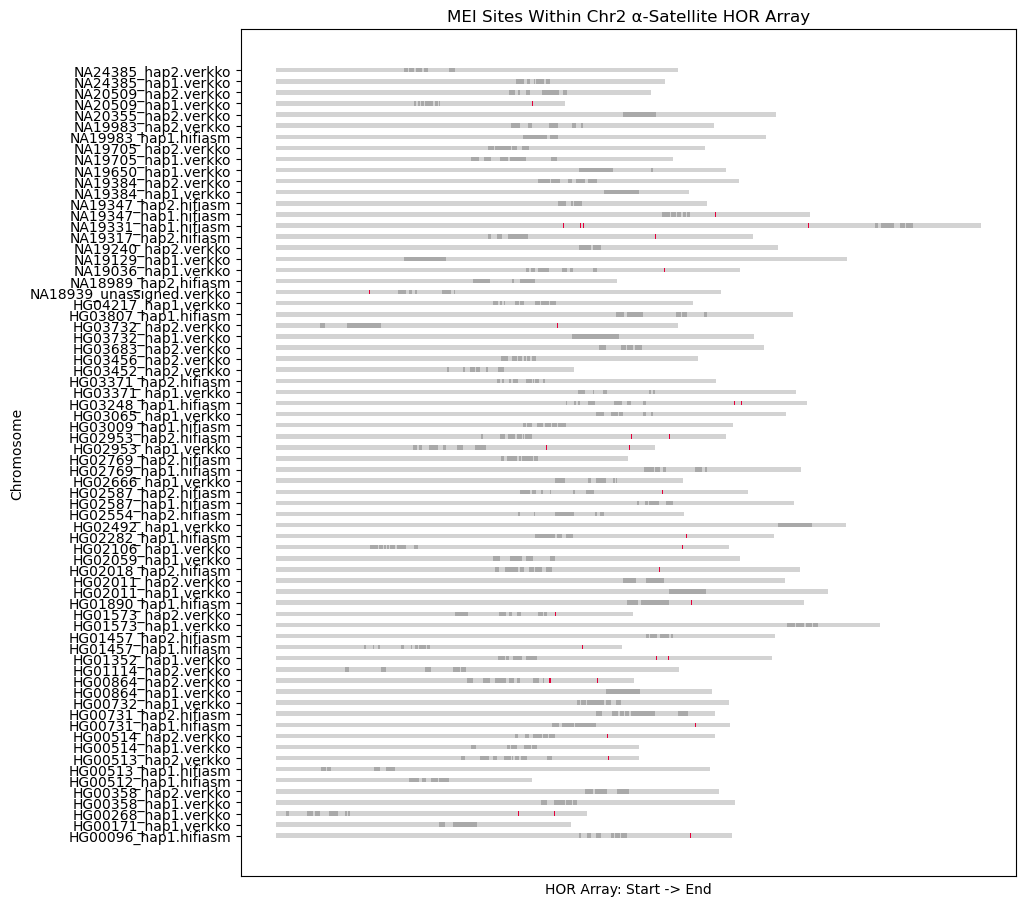

In [35]:
from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,11

color_lookup = {'#00d5ff':'#00d5ff',
 '#1a0af7':'#1a0af7',
 '#8cff00':'#8cff00',
 '#E4003A':'#E4003A',
 '#bc0af7':'#bc0af7',
 'darkgrey':'darkgrey',
 '#ffb300':'#ffb300',
 'lightgrey':'lightgrey'}

height = 20.95
spacing = 30.95

def ideograms(fn):
    last_chrom = None
    fin = open(fn)
    fin.readline()
    xranges, colors = [], []
    ymin = 0

    for line in fin:
        chrom, start, stop, label, stain = line.strip().split('\t')

        start = int(start)
        stop = int(stop)
        width = stop - start
        if chrom == last_chrom or (last_chrom is None):
            xranges.append((start, width))
            colors.append(color_lookup[stain])
            last_chrom = chrom
            continue

        ymin += height + spacing
        yrange = (ymin, height)
        yield xranges, yrange, colors, last_chrom
        xranges, colors = [], []
        xranges.append((start, width))
        colors.append(color_lookup[stain])
        last_chrom = chrom

    # last one
    ymin += height + spacing
    yrange = (ymin, height)
    yield xranges, yrange, colors, last_chrom

fig = plt.figure()
ax = fig.add_subplot(111)
d = {}
yticks = []
yticklabels = []

# ideogram.txt downloaded from UCSC's table browser
for xranges, yrange, colors, label in ideograms('/home/mark/Desktop/Test.txt'):
    coll = BrokenBarHCollection(xranges, yrange, facecolors=colors)
    #print(label)
    #print(colors)
    #print(xranges)
    ax.add_collection(coll)
    center = yrange[0] + yrange[1]/2.
    yticks.append(center)
    yticklabels.append(label)
    d[label] = xranges

ax.axis('tight')
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xticks([])
plt.ylabel('Chromosome')
plt.xlabel('HOR Array: Start -> End')
plt.title("MEI Sites Within Chr2 α-Satellite HOR Array")  

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#legend_elements = [Line2D([0], [0], color='#C8C9C7', lw=2, label='0'),
#                   Line2D([0], [0], color='navy', lw=2, label='1'),
#                   Line2D([0], [0], color='#005EB8', lw=2, label='2'),
#                   Line2D([0], [0], color='green', lw=2, label='3'),
#                  ]
#ax.legend(handles=legend_elements, loc='upper right', title='Total SVAs')
plt.savefig('/home/mark/Desktop/chr2Alpha.svg', dpi=300, bbox_inches='tight')
#plt.savefig('/home/mark/Desktop/chr2Alpha.png', dpi=300, bbox_inches='tight')
plt.show()


In [272]:
centroHORDF[centroHORDF['Haplotype'].str.contains("unassigned",regex=True)]

,0,1,2,3,Length,Start,End,Haplotype
971,NA18939,unassigned-0001658:138715-2295485,chr2,+,2156770,138715,2295485,unassigned-0001658_NA18939


In [283]:
len(set(centroHORDF[(centroHORDF[2]=='chr2')& (centroHORDF[3]=='-')]['Haplotype']))

31

In [285]:
flipped

['NA19036_hap1.verkko',
 'HG02059_hap1.verkko',
 'HG02106_hap1.verkko',
 'HG00512_hap1.hifiasm',
 'HG03683_hap2.verkko',
 'NA19317_hap2.hifiasm',
 'NA24385_hap1.verkko',
 'HG03452_hap2.verkko',
 'HG02953_hap2.hifiasm',
 'NA19240_hap2.verkko',
 'NA18989_hap2.hifiasm',
 'HG00096_hap1.hifiasm',
 'HG01890_hap1.hifiasm',
 'HG00731_hap1.hifiasm',
 'HG00514_hap1.verkko',
 'NA19129_hap1.verkko',
 'HG04217_hap1.verkko',
 'NA19347_hap2.hifiasm',
 'HG02011_hap2.verkko',
 'HG02587_hap1.hifiasm',
 'HG00731_hap2.hifiasm',
 'NA19331_hap1.hifiasm',
 'HG02769_hap1.hifiasm',
 'NA19384_hap1.verkko',
 'HG03456_hap2.verkko',
 'HG00513_hap1.hifiasm',
 'NA19705_hap1.verkko',
 'HG03009_hap1.hifiasm',
 'NA20509_hap2.verkko',
 'HG02011_hap1.verkko',
 'HG00171_hap1.verkko']